<a href="https://colab.research.google.com/github/siranjeevi1007/Codsoft/blob/main/Copy_of_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a custom dataset (like your own version of Iris dataset)
data = {
    'sepal_length': [5.1, 4.9, 6.7, 5.6, 6.5, 5.8, 6.9, 5.0, 6.3, 4.7],
    'sepal_width':  [3.5, 3.0, 3.1, 2.9, 3.0, 2.6, 3.1, 3.4, 2.5, 3.2],
    'petal_length': [1.4, 1.4, 5.6, 4.5, 5.8, 4.0, 5.4, 1.6, 5.0, 1.3],
    'petal_width':  [0.2, 0.2, 2.4, 1.5, 2.2, 1.2, 2.3, 0.4, 1.9, 0.2],
    'species':      ['setosa', 'setosa', 'virginica', 'versicolor', 'virginica',
                     'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa']
}

# Step 2: Convert to DataFrame
df = pd.DataFrame(data)

# Step 3: Split features and labels
X = df.drop('species', axis=1)
y = df['species']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train the Model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_test)

# Step 7: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         1
  versicolor       1.00      0.50      0.67         2
   virginica       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.67      0.50      0.56         3
weighted avg       1.00      0.67      0.78         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


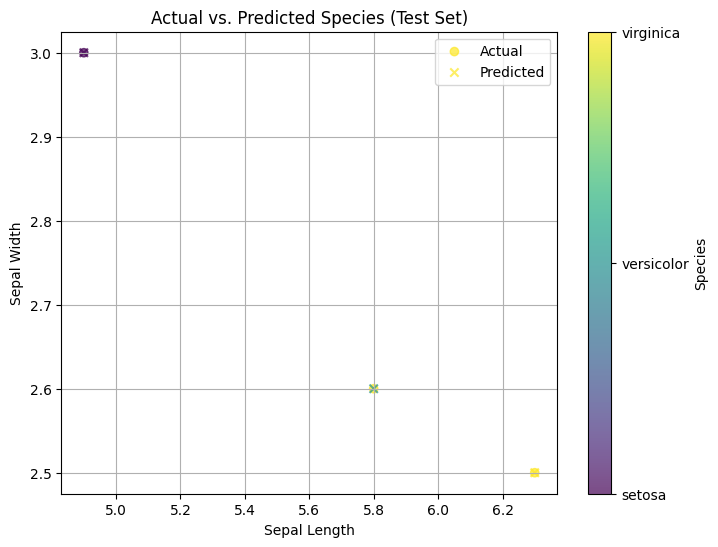

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new DataFrame for plotting the test data
plot_df = X_test.copy()
plot_df['actual_species'] = y_test
plot_df['predicted_species'] = y_pred

# Map species names to numerical labels for plotting
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
plot_df['actual_species_num'] = plot_df['actual_species'].map(species_map)
plot_df['predicted_species_num'] = plot_df['predicted_species'].map(species_map)

# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot actual species
plt.scatter(plot_df['sepal_length'], plot_df['sepal_width'], c=plot_df['actual_species_num'], marker='o', label='Actual', alpha=0.7)

# Plot predicted species with a different marker
plt.scatter(plot_df['sepal_length'], plot_df['sepal_width'], c=plot_df['predicted_species_num'], marker='x', label='Predicted', alpha=0.7)

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Actual vs. Predicted Species (Test Set)')
plt.legend()
plt.colorbar(ticks=[0, 1, 2], label='Species', format=plt.FuncFormatter(lambda i, *args: list(species_map.keys())[int(i)]))
plt.grid(True)
plt.show()